In [77]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout

In [78]:
classifier = Sequential()

In [79]:
# Convolution
classifier.add(Conv2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

C:\Users\ajarun\AppData\Local\Continuum\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [80]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [81]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

C:\Users\ajarun\AppData\Local\Continuum\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [82]:
# Flattening
classifier.add(Flatten())

In [83]:
# Full connection
classifier.add(Dense( units= 64, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))

In [84]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [85]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [86]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [87]:
training_set = train_datagen.flow_from_directory(r'C:\Users\ajarun\pics\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode='categorical')

Found 94 images belonging to 4 classes.


In [88]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [89]:
test_set = test_datagen.flow_from_directory(r'C:\Users\ajarun\pics\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 9 images belonging to 4 classes.


In [92]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs =10,
                         validation_data = test_set,
                         validation_steps = 2)

Epoch 1/10
10/10 [==============================] - 9s 935ms/step - loss: 0.3776 - accuracy: 0.8949 - val_loss: 1.9146 - val_accuracy: 0.2222
Epoch 2/10
10/10 [==============================] - 8s 824ms/step - loss: 0.4005 - accuracy: 0.8558 - val_loss: 1.7203 - val_accuracy: 0.3333
Epoch 3/10
10/10 [==============================] - 8s 802ms/step - loss: 0.2836 - accuracy: 0.9204 - val_loss: 1.6813 - val_accuracy: 0.4444
Epoch 4/10
10/10 [==============================] - 8s 770ms/step - loss: 0.2342 - accuracy: 0.9295 - val_loss: 2.0121 - val_accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 8s 782ms/step - loss: 0.2449 - accuracy: 0.9363 - val_loss: 1.7889 - val_accuracy: 0.5556
Epoch 6/10
10/10 [==============================] - 8s 792ms/step - loss: 0.1740 - accuracy: 0.9522 - val_loss: 1.8746 - val_accuracy: 0.5556
Epoch 7/10
10/10 [==============================] - 8s 810ms/step - loss: 0.1740 - accuracy: 0.9522 - val_loss: 1.6330 - val_accuracy: 0.5556
Epoch 

[[0. 1. 0. 0.]]
2
jan


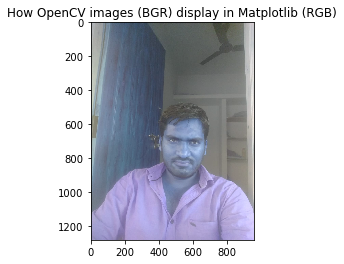

In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\ajarun\pics\test\sar\1.jpeg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
print(result)
values = np.array(result)
index_max = np.argmax(values)+1
print(index_max)
if index_max==2:
    prediction='jan'
elif index_max==1:
    prediction='Arun'
elif index_max==3:
    prediction='Saravanan'
elif index_max==4:
    prediction='Sathish'
else:
    prediction ='New person'
print(prediction)

'''training_set.class_indices
if result[0][0]>=0.5:
    prediction= 'dog'
else:
    prediction = 'cat'
print(prediction)'''

%matplotlib inline
imgloc = r'C:\Users\ajarun\pics\test\sar\1.jpeg'
img= cv2.imread(imgloc)
plt.title('How OpenCV images (BGR) display in Matplotlib (RGB)')
plt.imshow(img)
plt.show()